## Summary Of the Data

This Kaggle dataset contains information about 850 restaurants listed on the popular online food delivery and restaurant discovery platform, Zomato. The dataset provides a comprehensive collection of restaurant details, including their names, locations, ratings, cuisines, pricing, and more. This data is valuable for data analysis, market research, and gaining insights into the restaurant landscape in various cities.

`Dataset link:` https://www.kaggle.com/datasets/bharathdevanaboina/zomato-restaurants-dataset

## Attribute Information

- `Restaurant Name:` This column contains the name of the restaurant.

- `Dining Rating:` The "Dining Rating" column represents the average rating received by the restaurant for its dining experience. The rating is typically provided by customers who have dined at the restaurant and shared their feedback or reviews.

- `Delivery Rating:` The "Delivery Rating" column indicates the average rating received by the restaurant for its delivery service. This rating is based on customers' experiences with the restaurant's food delivery service.

- `Dining Votes:` This column shows the total number of votes or reviews received for the dining experience at the restaurant. Customers often rate their dining experiences by providing feedback or votes, which are used to calculate the average dining rating.

- `Delivery Votes:` The "Delivery Votes" column displays the total number of votes or reviews received for the delivery service provided by the restaurant. This column may contain "0" if delivery ratings are not applicable or unavailable.

- `Cuisines:` The cuisines or types of food served by the restaurant.

- `Place Name:` This column provides the location or area where the restaurant is situated.

- `City:` The "City" column specifies the city in which the restaurant is located.

- `Item Name:` The "Item Name" column lists the name of the food items available at the restaurant. It includes various dishes and meals offered by the restaurant.

- `Best Seller:` The "Best Seller" column indicates whether a particular food item is a bestseller or not. It helps identify popular items among customers.

- `Votes:` The "Votes" column represents the total number of votes or reviews received for a specific food item. Customers may provide feedback or ratings for individual food items.

- `Prices:` This column displays the price of each food item. It shows the cost of each dish or meal offered by the restaurant.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("zomato_dataset.csv")
df.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


### Column Types

- **Numerical:** Dining_Rating, Delivery_Rating, Dining Votes, Delivery_Votes, Votes, Prices

- **Categorical:** Restaurant_Name, Cuisine, Place_Name, City, Item_Name, Best_Seller

In [4]:
df.shape

(123657, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dining_Rating,91421.0,3.822264,0.408693,2.50,3.6,3.90,4.1,4.8
Delivery_Rating,122377.0,3.963184,0.245900,2.50,3.8,4.00,4.1,4.6
Dining Votes,123657.0,152.729858,232.214061,0.00,0.0,30.00,217.0,997.0
Delivery_Votes,123657.0,115.763725,243.970828,0.00,0.0,0.00,23.0,983.0
Votes,123657.0,24.666772,125.236009,0.00,0.0,0.00,15.0,9750.0
Prices,123657.0,241.378399,192.830713,0.95,130.0,208.57,299.0,12024.0


`Issues:`
- In Delivery_votes & votes minimum value, 25%, 50% all are 0 which seems unusual. `accuracy`
- Dinning_votes also have minimum value and 25% both '0'. `accuracy`
- Prices minimum value and maximum value might be outliers. `accuracy`


#### Data Quality Dimensions
- `Completeness` => is data missing?
- `Validity` => is data invalid like: negative height, duplicate patient id
- `Accuracy` => data is valid but not accurate like: weight of a man =  1kg (can't be possible)
- `Consistency` => both valid and accurate but written differently Like: New Youk and NY

#### Order of severity
- Completeness
- Validity 
- Accuracy 
- Consistency

In [6]:
df.isnull().sum()

Restaurant_Name        0
Dining_Rating      32236
Delivery_Rating     1280
Dining Votes           0
Delivery_Votes         0
Cuisine                0
Place_Name             0
City                   0
Item_Name              0
Best_Seller        95715
Votes                  0
Prices                 0
dtype: int64

`issues:`  Three features **Dining_Rating, Delivery_Rating** and **Best_Seller** contains missing values `completeness`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  123657 non-null  object 
 1   Dining_Rating    91421 non-null   float64
 2   Delivery_Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery_Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place_Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item_Name        123657 non-null  object 
 9   Best_Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [8]:
df1 = df.copy()
df1.head(3)

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0


In [9]:
df1["Best_Seller"].value_counts()

BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: Best_Seller, dtype: int64

In [10]:
df1["Best_Seller"] = df1["Best_Seller"].fillna("Not Available")

In [11]:
df1.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,Not Available,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [12]:
df1.dropna(subset=["Dining_Rating", "Delivery_Rating"], inplace=True)

In [13]:
df1.shape

(91360, 12)

In [14]:
df1["Best_Seller"].value_counts()

Not Available               71132
BESTSELLER                  12296
MUST TRY                     2734
Not eligible for coupons     2002
CHEF'S SPECIAL               1345
SPICY                         921
Not on Pro                    477
NEW                           332
SEASONAL                       70
VEGAN                          23
Eggless available              10
GLUTEN FREE                     9
FODMAP FRIENDLY                 7
DAIRY FREE                      2
Name: Best_Seller, dtype: int64

In [15]:
71132/91360

0.7785901926444834

`Conclusion:` Here we see that about 78% of data in Best_seller column is not available.

In [16]:
df1["Prices"].describe()

count    91360.000000
mean       240.020509
std        186.814637
min          0.950000
25%        133.330000
50%        209.520000
75%        299.000000
max      12024.000000
Name: Prices, dtype: float64

In [17]:
df1[df1["Prices"] > 1500]

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
165,BrownBear,3.6,4.0,239,0,Fast Food,Himayath Nagar,Hyderabad,Chocolate KitKat Cake,Not Available,0,1800.0
2999,McDonald's,3.2,3.9,137,0,Fast Food,MPM Mall,Hyderabad,Birthday Party Package - McVeggie,Not Available,0,2161.9
3189,Capital Multi Cuisine Restaurant,4.2,3.9,0,0,Beverages,Malakpet,Hyderabad,Chinese Platter,Not Available,0,2050.0
4629,Shah Ghouse Hotel & Restaurant,4.2,4.2,0,0,Desserts,Charminar,Hyderabad,Tandoori Family Platter,Not Available,6,1958.0
5119,Capital Multi Cuisine Restaurant,2.7,3.7,32,428,Mughlai,Basheer Bagh,Hyderabad,Mix Mandi,Not Available,0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106620,Paparizza - Woodfired Pizzas,4.3,3.8,0,0,Beverages,Delhi University-GTB Nagar,New Delhi,Grand House Party Combo Non Veg,Not Available,0,1599.0
107260,Wat-a-Burger! - India ka Burger,3.4,4.0,289,0,Beverages,Connaught Place,New Delhi,Party Pack For 6 Combo 2,Not eligible for coupons,0,2069.0
107261,Wat-a-Burger! - India ka Burger,3.4,4.0,289,0,Beverages,Connaught Place,New Delhi,Party Pack For 6 Combo 1,Not eligible for coupons,0,1929.0
107608,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,"Ferrero Rochers T-24, 895",Not Available,0,1545.0


`Conclusion:` Item having Prices greater than 1500 is mostly a family platter i.e, for more than one person. So for Our observation we will not include that for now. we can ignore these rows as there are only 185 rows.

In [18]:
df["Votes"].value_counts()

0       69187
5        4085
6        3500
7        2821
8        2544
        ...  
1163        1
734         1
713         1
404         1
685         1
Name: Votes, Length: 760, dtype: int64

## Data Visualisation

In [19]:
highRated_restaurants = df1[(df1['Dining_Rating'] > 4.0) & (df1['Delivery_Rating'] > 4.0)]

In [20]:
highRated_restaurants.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
409,Siddique Kabab Centre,4.4,4.1,732,0,Chinese,Tolichowki,Hyderabad,Grilled Chicken,MUST TRY,520,432.0
410,Siddique Kabab Centre,4.4,4.1,732,0,Chinese,Tolichowki,Hyderabad,Tandoori Chicken,MUST TRY,151,408.0
411,Siddique Kabab Centre,4.4,4.1,732,0,Chinese,Tolichowki,Hyderabad,Chicken 65 Gravy,BESTSELLER,179,168.0
412,Siddique Kabab Centre,4.4,4.1,732,0,Chinese,Tolichowki,Hyderabad,Fried Chicken Kebab [16 Pieces],MUST TRY,164,396.0
413,Siddique Kabab Centre,4.4,4.1,732,0,Chinese,Tolichowki,Hyderabad,Tangdi Kebab [4 Pieces],Not Available,82,240.0


In [21]:
# For restaurant_name w.r.t. Dining Rating
restaurant_ratings = highRated_restaurants.groupby('Restaurant_Name')['Dining_Rating'].max()

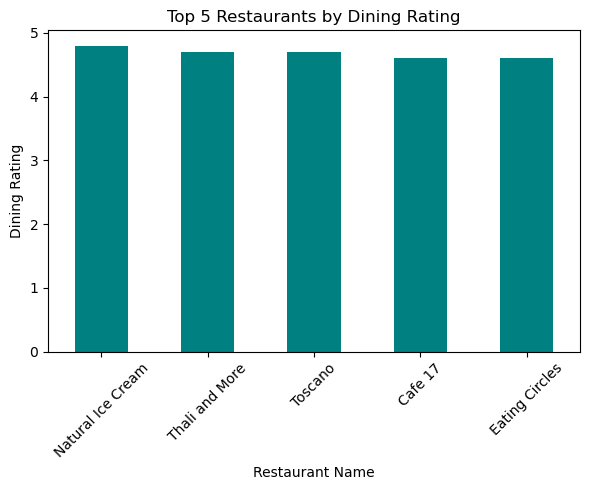

In [22]:
# top 5 restaurants based on  Dining ratings
top_restaurants = restaurant_ratings.nlargest(5)

# Creating a bar graph
plt.figure(figsize=(6, 5))
top_restaurants.plot(kind='bar', color='teal')
plt.title('Top 5 Restaurants by Dining Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Dining Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# For restaurant_name w.r.t. Delivery Rating
restaurant_ratings1 = highRated_restaurants.groupby('Restaurant_Name')['Delivery_Rating'].max()

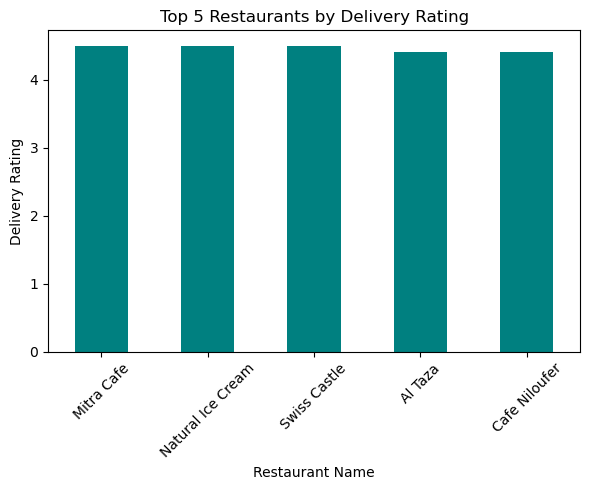

In [24]:
# top 5 restaurants based on  Delivery ratings
top_restaurants1 = restaurant_ratings1.nlargest(5)

# Creating a bar graph
plt.figure(figsize=(6, 5))
top_restaurants1.plot(kind='bar', color='teal')
plt.title('Top 5 Restaurants by Delivery Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Delivery Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

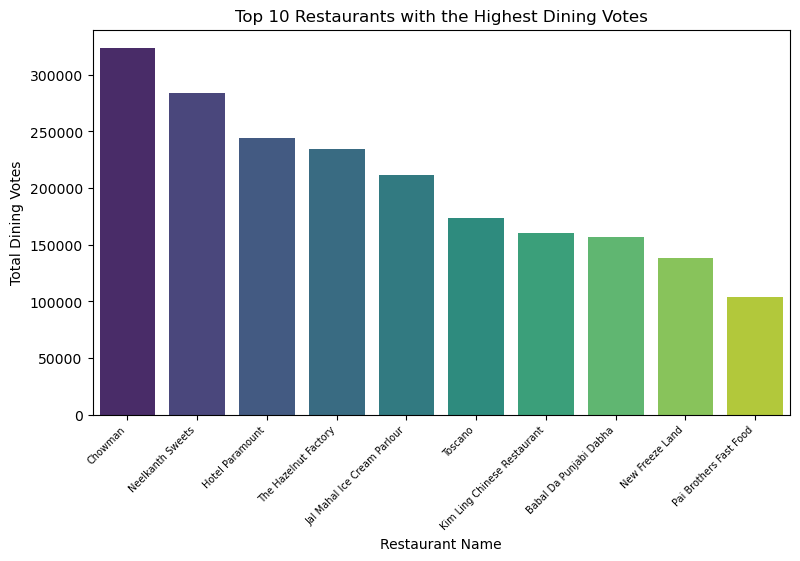

In [26]:
# Top 10 Restaurant having Highest Dinning Votes
top_dining_restaurants = highRated_restaurants.groupby('Restaurant_Name')['Dining Votes'].sum().nlargest(10)
plt.figure(figsize=(9, 5))
sns.barplot(x=top_dining_restaurants.index, y=top_dining_restaurants.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Dining Votes')
plt.title('Top 10 Restaurants with the Highest Dining Votes')
plt.show()

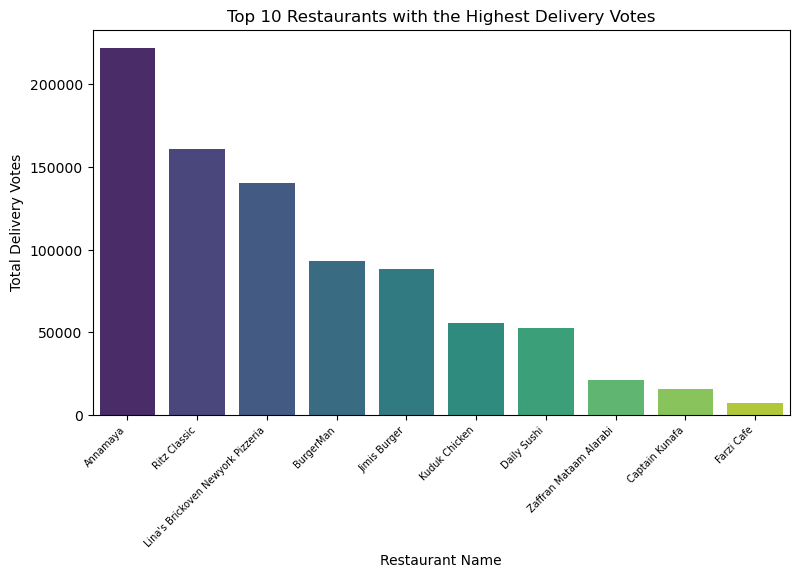

In [27]:
# Top 10 Restaurant having Highest Delivery Votes
top_delivery_restaurants = highRated_restaurants.groupby('Restaurant_Name')['Delivery_Votes'].sum().nlargest(10)
plt.figure(figsize=(9, 5))
sns.barplot(x=top_delivery_restaurants.index, y=top_delivery_restaurants.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Delivery Votes')
plt.title('Top 10 Restaurants with the Highest Delivery Votes')
plt.show()

In [29]:
# For restaurant_name w.r.t. Delivery Rating
restaurant_prices = highRated_restaurants.groupby('Restaurant_Name')['Prices'].mean()

In [30]:
restaurant_prices

Restaurant_Name
1944 -The HOCCO Kitchen    356.283784
4M Biryani House           211.570312
Al Taza                    173.823529
Annamaya                   257.789700
Arham                      228.863924
                              ...    
Urban Khichdi              240.680000
Ustaad's Kitchen           265.096154
Wafflez                    140.176471
Zaffran Mataam Alarabi     805.652174
Zam Zam Restaurant         174.323810
Name: Prices, Length: 106, dtype: float64

In [31]:
# Group the data by 'Restaurant_Name' and calculate the average price and place name for each restaurant
restaurant_info = highRated_restaurants.groupby('Restaurant_Name').agg({'Prices': 'mean', 'Place_Name': 'first'})
restaurant_info

,Prices,Place_Name
Restaurant_Name,,
1944 -The HOCCO Kitchen,356.283784,Navrangpura
4M Biryani House,211.570312,Musheerabad
Al Taza,173.823529,Kaloor
Annamaya,257.789700,Byculla
Arham,228.863924,Ajmer Highway
...,...,...
Urban Khichdi,240.680000,Navrangpura
Ustaad's Kitchen,265.096154,Devendra Nagar
Wafflez,140.176471,Samta Colony


In [32]:
top_price_restaurants = restaurant_info.nlargest(5, 'Prices')
top_price_restaurants

,Prices,Place_Name
Restaurant_Name,,
Zaffran Mataam Alarabi,805.652174,Falaknuma
Exotica,561.775148,12th Square Building
The Fatty Bao,555.720930,Linking Road
Lina's Brickoven Newyork Pizzeria,552.110345,T. Nagar
Fayrouz,551.680251,Prahlad Nagar


<Figure size 1200x800 with 0 Axes>

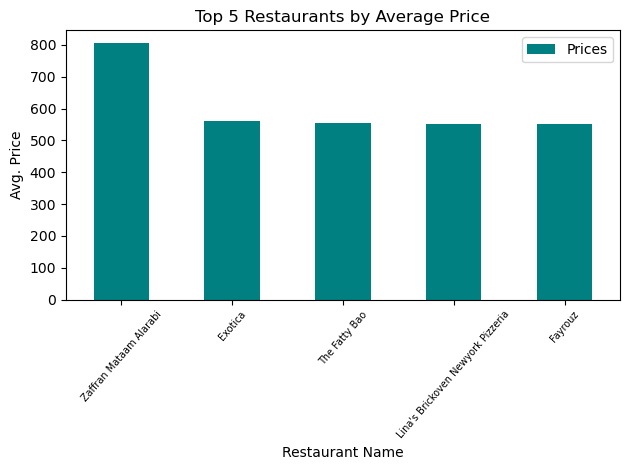

In [33]:
# Creating a bar graph
plt.figure(figsize=(12, 8))
top_price_restaurants.plot(kind='bar', color='teal')
plt.title('Top 5 Restaurants by Average Price')
plt.xlabel('Restaurant Name')
plt.ylabel('Avg. Price')
plt.xticks(rotation=49, fontsize=7)
plt.tight_layout()
plt.show()

In [34]:
popular_items = highRated_restaurants.groupby('Item_Name')["Votes"].max()

In [35]:
popular_items = popular_items.nlargest(5)

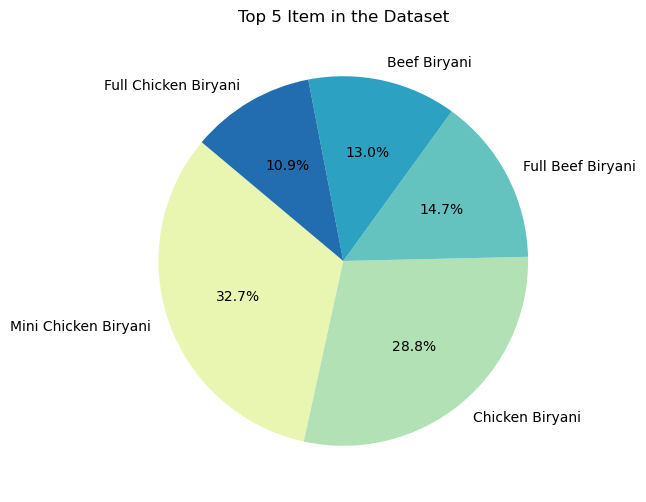

In [36]:
plt.figure(figsize=(6, 6))
sns.set_palette('YlGnBu')  
plt.pie(popular_items, labels=popular_items.index ,autopct='%.1f%%', startangle=140)
plt.title('Top 5 Item in the Dataset')
plt.show()

In [37]:
best_seller_items = highRated_restaurants.groupby('Best_Seller')["Votes"].max().nlargest(3)

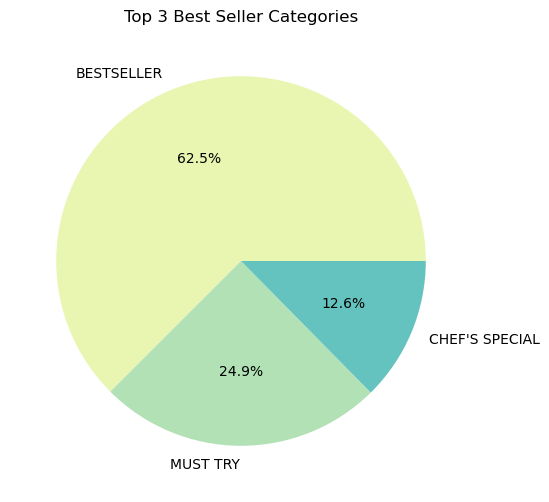

In [38]:
plt.figure(figsize=(6, 6))
sns.set_palette('YlGnBu')  
plt.pie(best_seller_items, labels=best_seller_items.index ,autopct='%.1f%%')
plt.title('Top 3 Best Seller Categories')
plt.show()

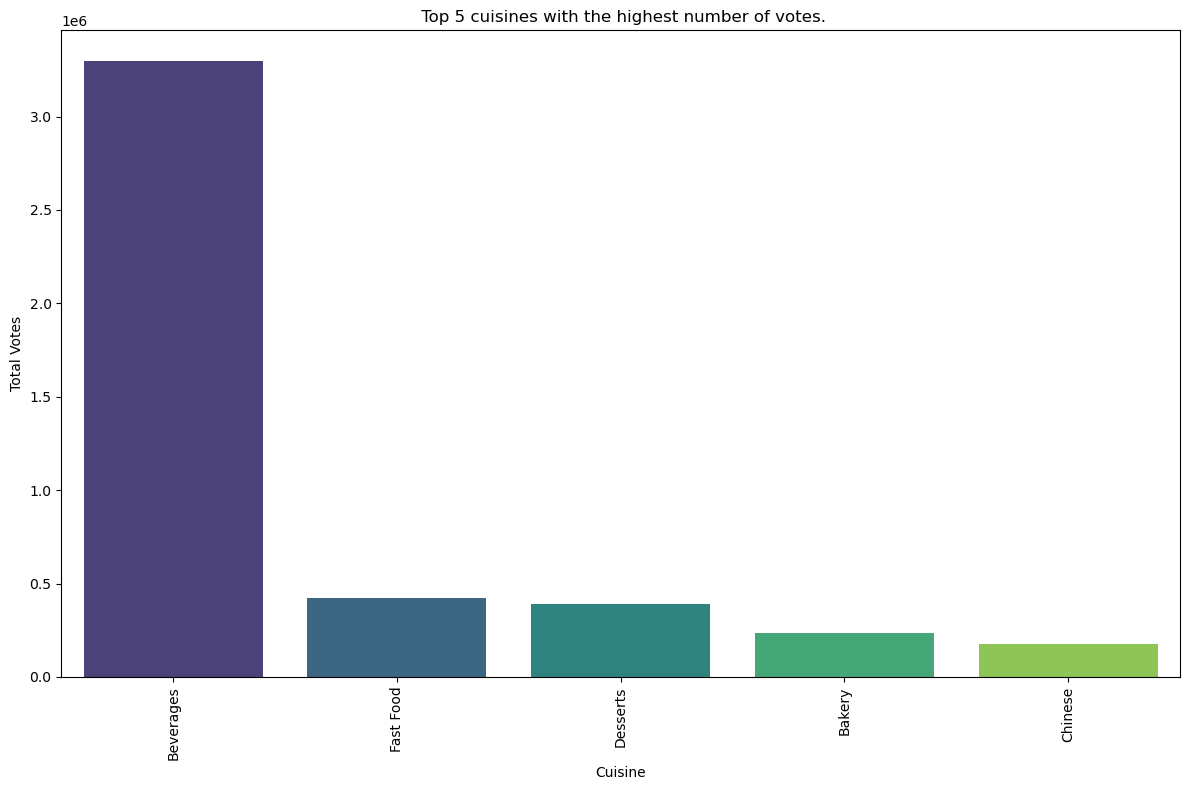

In [44]:
# Group the data by cuisine and calculate the sum of dining and delivery votes for each cuisine
cuisine_popularity = highRated_restaurants.groupby('Cuisine ')[['Dining Votes', 'Delivery_Votes']].sum()

# Calculate the total votes for each cuisine by summing dining and delivery votes
cuisine_popularity['Total Votes'] = cuisine_popularity['Dining Votes'] + cuisine_popularity['Delivery_Votes']

# Sort the cuisines by total votes in descending order
sorted_cuisine_popularity = cuisine_popularity.nlargest(5, 'Total Votes')

# Create a bar plot to visualize cuisine popularity and total votes
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_cuisine_popularity.index, y='Total Votes', data=sorted_cuisine_popularity, palette='viridis')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.title(' Top 5 cuisines with the highest number of votes.')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

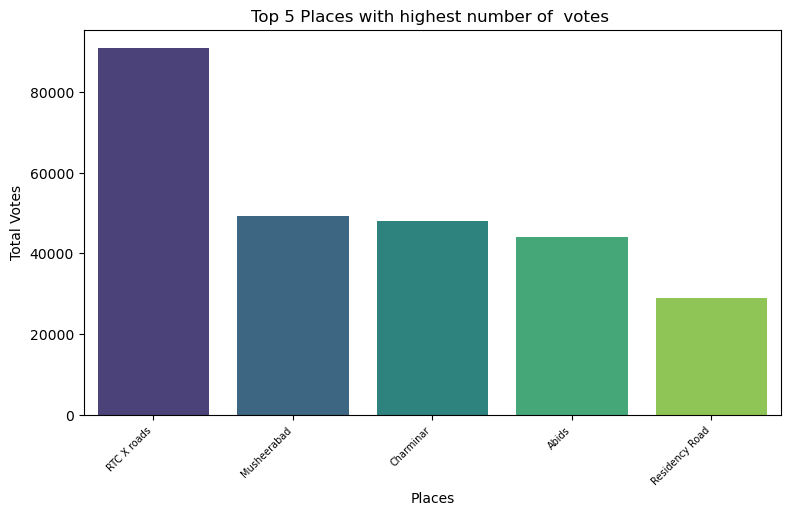

In [45]:
# Top 5 Places
top_places = highRated_restaurants.groupby('Place_Name')['Votes'].sum().nlargest(5)
plt.figure(figsize=(9, 5))
sns.barplot(x=top_places.index, y=top_places.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.xlabel('Places')
plt.ylabel('Total Votes')
plt.title('Top 5 Places with highest number of  votes ')
plt.show()

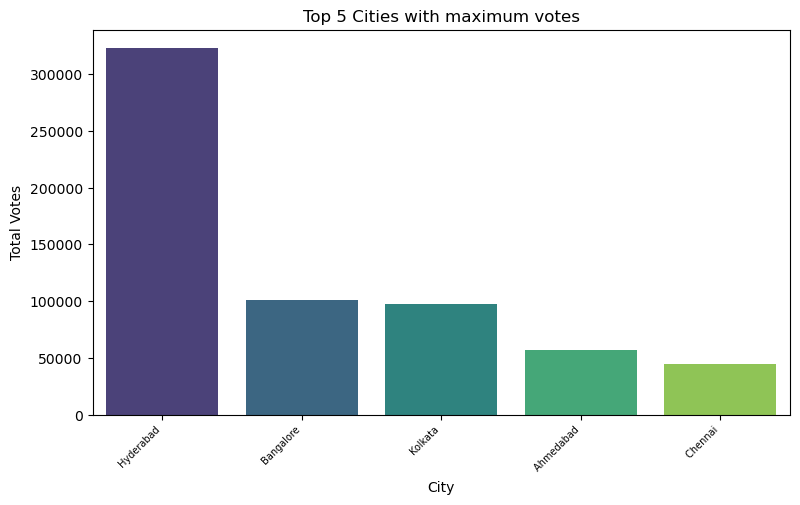

In [46]:
# Top 5 Cities
top_places = highRated_restaurants.groupby('City')['Votes'].sum().nlargest(5)
plt.figure(figsize=(9, 5))
sns.barplot(x=top_places.index, y=top_places.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.xlabel('City')
plt.ylabel('Total Votes')
plt.title('Top 5 Cities with maximum votes')
plt.show()